In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm


# LOCAL
from src.getData import *
goldmine = getData.GOLDMINE()

In [ ]:
# data = getData.GOLDMINE().get_price(split=20)

In [306]:
data = history('CFFEX.T', start_time='2017-01-01', end_time='2017-12-31', frequency='1m', df=True)

In [ ]:
history('CFFEX.IF', start_time='2022-12-30', end_time='2023-12-31', frequency='1m', df=True)

,symbol,frequency,open,high,low,close,volume,amount,pre_close,position,bob,eob
0,CFFEX.IF,60s,3885.0,3893.4,3885.0,3888.6,1691,1973198460.0,0.0,86125,2022-12-30 09:30:00+08:00,2022-12-30 09:31:00+08:00
1,CFFEX.IF,60s,3889.4,3895.4,3889.4,3894.8,887,1036010880.0,0.0,85510,2022-12-30 09:31:00+08:00,2022-12-30 09:32:00+08:00
2,CFFEX.IF,60s,3894.8,3896.4,3893.6,3894.8,775,905602920.0,0.0,85084,2022-12-30 09:32:00+08:00,2022-12-30 09:33:00+08:00
3,CFFEX.IF,60s,3894.4,3896.4,3891.6,3892.2,539,629666700.0,0.0,84718,2022-12-30 09:33:00+08:00,2022-12-30 09:34:00+08:00
4,CFFEX.IF,60s,3892.4,3895.8,3892.4,3895.6,357,417066000.0,0.0,84527,2022-12-30 09:34:00+08:00,2022-12-30 09:35:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...
235,CFFEX.IF,60s,3885.4,3885.4,3883.8,3884.2,450,524414340.0,0.0,82665,2022-12-30 14:55:00+08:00,2022-12-30 14:56:00+08:00
236,CFFEX.IF,60s,3884.4,3884.8,3883.4,3883.6,380,442812840.0,0.0,82759,2022-12-30 14:56:00+08:00,2022-12-30 14:57:00+08:00
237,CFFEX.IF,60s,3884.2,3884.2,3881.2,3882.0,534,622002300.0,0.0,82947,2022-12-30 14:57:00+08:00,2022-12-30 14:58:00+08:00
238,CFFEX.IF,60s,3882.2,3882.4,3879.2,3879.6,852,991980300.0,0.0,83421,2022-12-30 14:58:00+08:00,2022-12-30 14:59:00+08:00


In [308]:
data.index = pd.to_datetime(data.eob).dt.tz_localize(None)
data['day'] = data.index.date
data.index.names = ['date']
data

,symbol,frequency,open,high,low,close,volume,amount,pre_close,position,bob,eob,day
date,,,,,,,,,,,,,
2017-01-03 09:31:00,CFFEX.T,60s,97.485,97.525,97.285,97.335,1450,1412469550.0,0.0,41339,2017-01-03 09:30:00+08:00,2017-01-03 09:31:00+08:00,2017-01-03
2017-01-03 09:32:00,CFFEX.T,60s,97.330,97.345,97.305,97.340,151,146958300.0,0.0,41359,2017-01-03 09:31:00+08:00,2017-01-03 09:32:00+08:00,2017-01-03
2017-01-03 09:33:00,CFFEX.T,60s,97.340,97.345,97.320,97.345,108,105115700.0,0.0,41388,2017-01-03 09:32:00+08:00,2017-01-03 09:33:00+08:00,2017-01-03
2017-01-03 09:34:00,CFFEX.T,60s,97.340,97.350,97.335,97.345,162,157698400.0,0.0,41354,2017-01-03 09:33:00+08:00,2017-01-03 09:34:00+08:00,2017-01-03
2017-01-03 09:35:00,CFFEX.T,60s,97.355,97.365,97.320,97.320,208,202479150.0,0.0,41305,2017-01-03 09:34:00+08:00,2017-01-03 09:35:00+08:00,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 15:11:00,CFFEX.T,60s,93.160,93.160,93.100,93.120,593,552225950.0,0.0,59555,2017-12-29 15:10:00+08:00,2017-12-29 15:11:00+08:00,2017-12-29
2017-12-29 15:12:00,CFFEX.T,60s,93.120,93.150,93.120,93.140,266,247749550.0,0.0,59473,2017-12-29 15:11:00+08:00,2017-12-29 15:12:00+08:00,2017-12-29
2017-12-29 15:13:00,CFFEX.T,60s,93.140,93.160,93.135,93.160,136,126681800.0,0.0,59453,2017-12-29 15:12:00+08:00,2017-12-29 15:13:00+08:00,2017-12-29


In [309]:
from scipy.stats import linregress

def rolling_linreg(y):
    x_len = len(y)
    # if x_len < N:
    #     return np.nan  # 避免影响数据
    if np.std(y) == 0:
        return 0  # 如果标准差为 0，返回 0 避免 NaN
    y_std = (y - np.mean(y)) / np.std(y)  # 标准化数据
    idx = np.arange(x_len)  # X 变量（索引）
    slope, intercept, r_value, p_value, std_err = linregress(idx, y_std)
    return slope  # 返回斜率（beta 系数）

df = data.copy()
df['rolling_5close_slope'] = df.groupby('day').close.rolling(5).apply(rolling_linreg).groupby('day').shift(1).droplevel(0)
# df['rolling_5vol_slope'] = df.rolling(5).volume.apply(rolling_linreg).shift(1)

In [310]:
df

,symbol,frequency,open,high,low,close,volume,amount,pre_close,position,bob,eob,day,rolling_5close_slope
date,,,,,,,,,,,,,,
2017-01-03 09:31:00,CFFEX.T,60s,97.485,97.525,97.285,97.335,1450,1412469550.0,0.0,41339,2017-01-03 09:30:00+08:00,2017-01-03 09:31:00+08:00,2017-01-03,NaN
2017-01-03 09:32:00,CFFEX.T,60s,97.330,97.345,97.305,97.340,151,146958300.0,0.0,41359,2017-01-03 09:31:00+08:00,2017-01-03 09:32:00+08:00,2017-01-03,NaN
2017-01-03 09:33:00,CFFEX.T,60s,97.340,97.345,97.320,97.345,108,105115700.0,0.0,41388,2017-01-03 09:32:00+08:00,2017-01-03 09:33:00+08:00,2017-01-03,NaN
2017-01-03 09:34:00,CFFEX.T,60s,97.340,97.350,97.335,97.345,162,157698400.0,0.0,41354,2017-01-03 09:33:00+08:00,2017-01-03 09:34:00+08:00,2017-01-03,NaN
2017-01-03 09:35:00,CFFEX.T,60s,97.355,97.365,97.320,97.320,208,202479150.0,0.0,41305,2017-01-03 09:34:00+08:00,2017-01-03 09:35:00+08:00,2017-01-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 15:11:00,CFFEX.T,60s,93.160,93.160,93.100,93.120,593,552225950.0,0.0,59555,2017-12-29 15:10:00+08:00,2017-12-29 15:11:00+08:00,2017-12-29,-0.56728169
2017-12-29 15:12:00,CFFEX.T,60s,93.120,93.150,93.120,93.140,266,247749550.0,0.0,59473,2017-12-29 15:11:00+08:00,2017-12-29 15:12:00+08:00,2017-12-29,-0.55806870
2017-12-29 15:13:00,CFFEX.T,60s,93.140,93.160,93.135,93.160,136,126681800.0,0.0,59453,2017-12-29 15:12:00+08:00,2017-12-29 15:13:00+08:00,2017-12-29,-0.57655666


In [305]:
df['signal'] = np.where(df.rolling_5close_slope > 0.6, 
                        -1, 
                        np.where(df.rolling_5close_slope < -0.6, 1, 0))
df['position'] = None
grouped = 0
position = 0
last_index = df.groupby('day').tail(1).index
for i in tqdm(range(len(df)-1)):
    last_raw = df.iloc[i]
    now_raw = df.iloc[i+1]
    



    if last_raw.signal != -1 and now_raw.signal == -1 and position >-1:   # 开空
        grouped += 1
        position += -1

    elif last_raw.signal != 1 and now_raw.signal == 1 and position < 1:   # 开多
        grouped += 1
        position += 1

    # 每日收盘的仓位归0
    if now_raw.name in last_index:
        grouped += 1
        position = 0

    df.loc[now_raw.name, 'position'] = position
    df.loc[now_raw.name, 'grouped_position'] = f'{grouped}_{position}'
    # df.loc[now_raw.name, 'position'] = position

  0%|          | 0/123382 [00:00<?, ?it/s]

100%|██████████| 123382/123382 [00:39<00:00, 3118.78it/s]


In [302]:
revenue_dict = {}
for position, grouped in df.groupby('grouped_position'):
    if position.split('_')[-1] == '1':
        revenue = grouped.iloc[0].close / grouped.iloc[-1].open - 1
        revenue_dict[position] = revenue

    elif position.split('_')[-1] == '-1':
        revenue = grouped.iloc[0].open / grouped.iloc[-1].close - 1
        revenue_dict[position] = revenue

In [303]:
revenue_df = pd.DataFrame(revenue_dict, index=['revenue']).T
revenue_df['grouped'] = revenue_df.index.str.split('_').map(lambda x: int(x[0]))
revenue_df['grouped_position'] = revenue_df.index.str.split('_').map(lambda x: x[1])
revenue_df = revenue_df.set_index('grouped').sort_index()

<Axes: xlabel='grouped'>

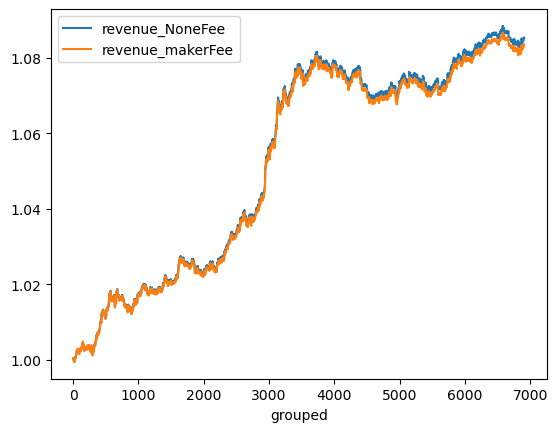

In [304]:
(revenue_df['revenue'] + 1).cumprod().plot(legend=True, label='revenue_NoneFee')
(revenue_df['revenue'] + 1 - 0.0000005).cumprod().plot(legend=True, label='revenue_makerFee')

In [212]:
df.loc['2023-01-03'].position.value_counts()

position
0     105
-1     87
1      47
Name: count, dtype: int64

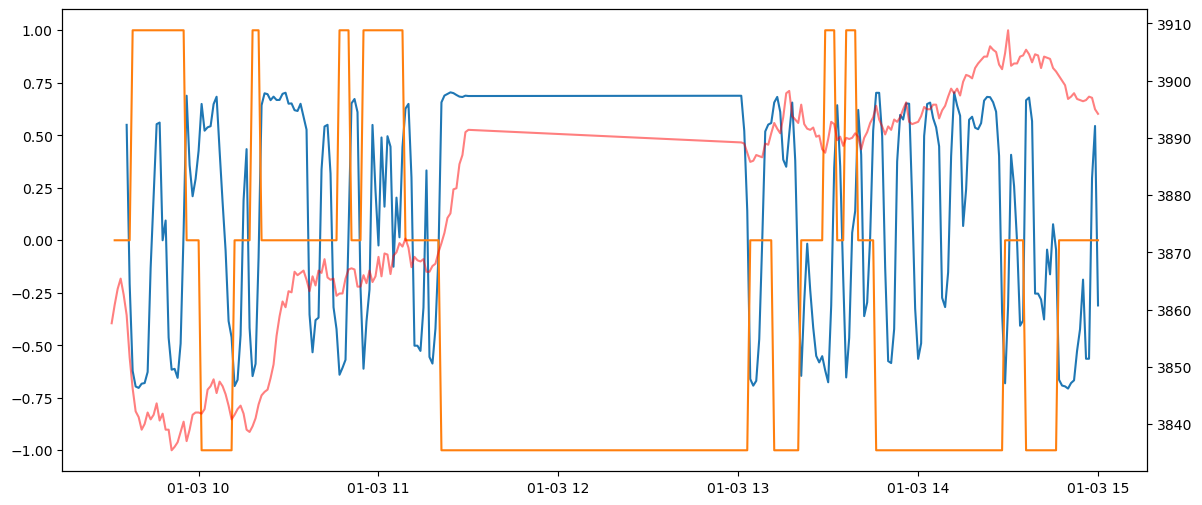

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.plot(df.loc['2023-01-03'].rolling_5close_slope)
ax.plot(df.loc['2023-01-03'].position)

ax_right = ax.twinx()
ax_right.plot(df.loc['2023-01-03'].close, color='r', alpha=0.5)
plt.show()

In [221]:
df.loc['2023-01-03 11:20:00':].head(10)

,symbol,frequency,open,high,low,close,volume,amount,pre_close,position,bob,eob,date,day,rolling_5close_slope,signal,grouped_position
date,,,,,,,,,,,,,,,,,
2023-01-03 11:20:00,CFFEX.IF,60s,3868.0,3870.8,3868.0,3870.0,107,124212540.0,0.0,0,2023-01-03 11:19:00+08:00,2023-01-03 11:20:00+08:00,2023-01-03,2023-01-03,-0.07102706,0,10_0
2023-01-03 11:21:00,CFFEX.IF,60s,3870.6,3871.8,3870.4,3871.6,142,164914380.0,0.0,-1,2023-01-03 11:20:00+08:00,2023-01-03 11:21:00+08:00,2023-01-03,2023-01-03,0.65686237,-1,11_-1
2023-01-03 11:22:00,CFFEX.IF,60s,3871.6,3873.4,3871.6,3873.4,241,279989160.0,0.0,-1,2023-01-03 11:21:00+08:00,2023-01-03 11:22:00+08:00,2023-01-03,2023-01-03,0.68905905,-1,11_-1
2023-01-03 11:23:00,CFFEX.IF,60s,3873.8,3876.2,3873.8,3876.0,377,438288960.0,0.0,-1,2023-01-03 11:22:00+08:00,2023-01-03 11:23:00+08:00,2023-01-03,2023-01-03,0.69657380,-1,11_-1
2023-01-03 11:24:00,CFFEX.IF,60s,3876.2,3877.8,3876.2,3876.8,405,471077820.0,0.0,-1,2023-01-03 11:23:00+08:00,2023-01-03 11:24:00+08:00,2023-01-03,2023-01-03,0.70445388,-1,11_-1
2023-01-03 11:25:00,CFFEX.IF,60s,3877.2,3882.0,3877.2,3881.0,455,529524720.0,0.0,-1,2023-01-03 11:24:00+08:00,2023-01-03 11:25:00+08:00,2023-01-03,2023-01-03,0.70073399,-1,11_-1
2023-01-03 11:26:00,CFFEX.IF,60s,3881.4,3882.2,3880.0,3881.2,322,374923920.0,0.0,-1,2023-01-03 11:25:00+08:00,2023-01-03 11:26:00+08:00,2023-01-03,2023-01-03,0.69191454,-1,11_-1
2023-01-03 11:27:00,CFFEX.IF,60s,3881.4,3885.4,3881.2,3885.4,530,617464620.0,0.0,-1,2023-01-03 11:26:00+08:00,2023-01-03 11:27:00+08:00,2023-01-03,2023-01-03,0.68417775,-1,11_-1
2023-01-03 11:28:00,CFFEX.IF,60s,3885.0,3887.8,3884.8,3887.0,410,477963000.0,0.0,-1,2023-01-03 11:27:00+08:00,2023-01-03 11:28:00+08:00,2023-01-03,2023-01-03,0.68230572,-1,11_-1


In [226]:
3870.6 / 3887.4 - 1

-0.004321654576323608

In [220]:
revenue_df.head(10)

,revenue,grouped_position
grouped,,
1,0.00192769,1
3,0.00026036,-1
5,-0.00036449,1
7,-0.00067263,1
9,-0.00139484,1
11,-0.00432165,-1
13,-0.00046242,-1
15,-0.00143848,1
17,-0.00005141,1


<Axes: xlabel='date'>

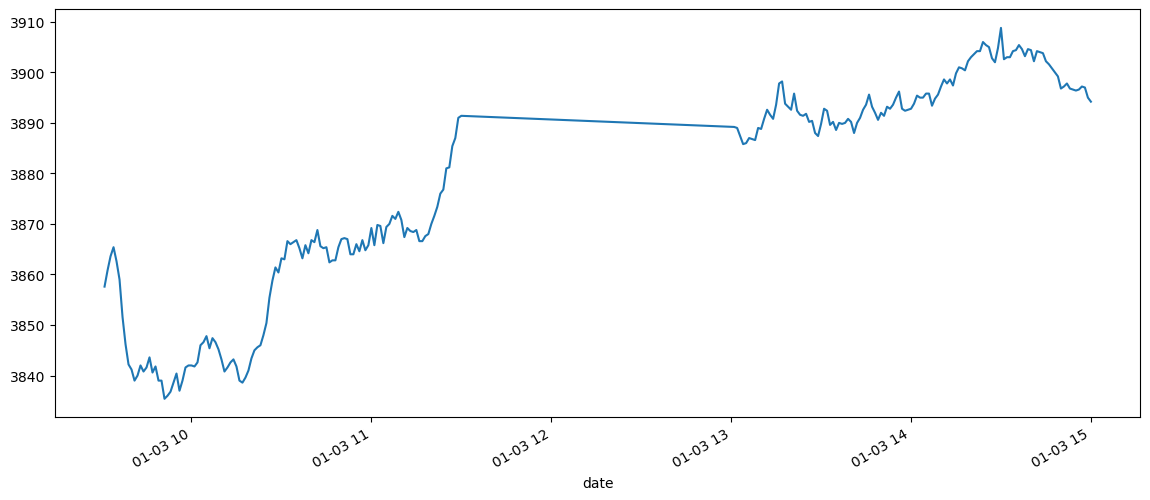

In [205]:
plt.figure(figsize=(14, 6))
df.loc['2023-01-03'].close.plot()

In [26]:
data['vwap'] = (data[['open', 'high', 'low']].mean(axis=1) * data.volume).cumsum() / data.volume.cumsum()

<Axes: >

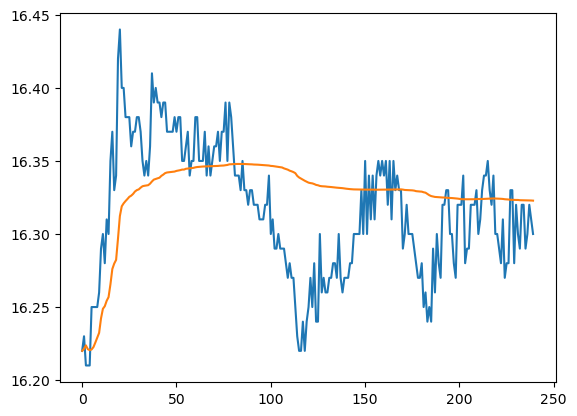

In [28]:
data.close.plot()
data.vwap.plot()
